[![Colab Badge Link](https://img.shields.io/badge/open-in%20colab-blue)](https://colab.research.google.com/github/Glasgow-AI4BioMed/tutorials/blob/main/getting_mesh_tags_with_entrez_api.ipynb)

# Getting MeSH Tags with Entrez API

Biomedical research articles that are indexed in the [PubMed database](https://pubmed.ncbi.nlm.nih.gov/) are manually tagged with [Medical Subject Headings (MeSH)](https://en.wikipedia.org/wiki/Medical_Subject_Headings). These provide information on the main topics of a research paper.

You can see the MeSH terms for an article at the bottom of a page on PubMed. For example, for the [Biopython paper](https://pubmed.ncbi.nlm.nih.gov/19304878/), the MeSH terms are the bottom of the page are:




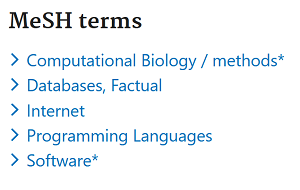

Let's use the PubMed API to get the MeSH terms for an article programmatically.

## Install biopython

The biopython library is a useful bioinformatics library and has some nice methods to access the Pubmed API. Let's install it.

In [1]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.2 MB/s eta 0:00:00


You need to provide your email address (fill in the line below) when accessing the PubMed API. This is so that they can contact you if your code goes crazy and start hammering their systems.

In [2]:
from Bio import Entrez

Entrez.email = ''
assert Entrez.email, "You need to provide your email address to use this API"

## Fetch a record

The code below fetches the record using the PubMed identifier. In this case, we get the document with [ID=19304878](https://pubmed.ncbi.nlm.nih.gov/19304878/). You can get multiple records by passing a list of IDs to the `id` parameter.

In [3]:
handle = Entrez.efetch(db="pubmed", id="19304878", rettype="gb", retmode="xml")
record = Entrez.read(handle)
handle.close()

## Extract the metadata

The data returned contains a lot of metadata, including title, authors, journal name, MeSH headings and more.

Let's get the title out.

In [4]:
article_data = record['PubmedArticle'][0]['MedlineCitation']

title = article_data['Article']['ArticleTitle']

print(f"{title=}")

title='Biopython: freely available Python tools for computational molecular biology and bioinformatics.'


And now let's get the MeSH descriptors out.

In [5]:
for mesh_heading in article_data['MeshHeadingList']:
  descriptor_name = str(mesh_heading['DescriptorName'])
  print(descriptor_name)

Computational Biology
Databases, Factual
Internet
Programming Languages
Software


## Getting more info

Practically, there is a lot more info that can be extracted such as journal name, publication dates and other MeSH information.

Taking a look at the MeSH terms from [the PubMed page](https://pubmed.ncbi.nlm.nih.gov/19304878/) again: Note that the first MeSH term has a subcategory (methods) known as a qualifier. And some have an asterisk against them, highlighting that they are a major topic of this article. The API can also provide this data too.

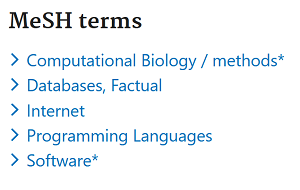